# AI Workshop - Lab 1-1: Data Cleaning and Processing

In this lab, we’ll explore the foundational steps of **data cleaning and processing**, essential for preparing raw data for machine learning models. Using an energy forecasting dataset, we will work through common challenges in data preprocessing, including handling missing values, normalizing data, and addressing imbalanced classes.

### Energy Market Forecasting Dataset

The dataset used in this lab focuses on energy forecasting in Spain, combining information from multiple sources:
- **Energy consumption and generation**: Data from ENTSOE (European Network of Transmission System Operators for Electricity).
- **Settlement prices**: Market prices from Red Eléctrica España.
- **Weather data**: Sourced from the Open Weather API for five major Spanish cities.

This dataset was originally obtained from Kaggle, and can be found here: [Spanish High Resolution Energy Dataset](https://www.kaggle.com/nicholasjhana/energy-consumption-generation-prices-and-weather).

This dataset is rich with **time series, numerical, and categorical data**, providing an excellent opportunity to learn practical preprocessing techniques. Forecasting energy demand and renewable energy generation is a real-world challenge with significant implications for transitioning to sustainable energy systems.

### Key Steps in Lab

1. **Data Inspection**:
   - Explore the structure of the dataset using Pandas.
   - Identify missing values and data inconsistencies.
   - Generate a profiling report using `ydata-profiling` to visualize and understand the dataset.

2. **Data Preprocessing**:
   - **Normalization**: Scale numerical features to ensure equal weighting during model training.
   - **One-Hot Encoding**: Convert categorical columns (e.g., city names) into a numeric format suitable for machine learning models.
   - **Handling Missing Values**:
     - Explore the trade-offs of removing rows or columns with missing values.
     - Prepare a cleaned dataset by dropping irrelevant or incomplete columns.

3. **Building a Baseline Model**:
   - Train a **Random Forest Classifier** to predict weather conditions based on energy generation data.
   - Evaluate the model’s accuracy and analyze its performance for each weather type.

4. **Addressing Imbalanced Classes**:
   - Group less common weather types into a single category to improve model performance.
   - Re-train and evaluate the updated model.

### Goals

By the end of this lab, you will:
- Understand key data preprocessing techniques and their importance for machine learning.
- Learn to handle common challenges such as missing values, normalization, and imbalanced datasets.
- Build and evaluate a simple machine learning model using Scikit-Learn.
- Gain insight into the trade-offs and decisions involved in real-world data preparation.

Let’s get started by loading the dataset and inspecting it to identify preprocessing needs!

This line installs the **`ydata-profiling`** library, a tool for generating detailed reports about a dataset’s structure and contents. Let’s break it down:

1. **The Exclamation Mark (`!`)**:
   - In a Jupyter notebook or Google Colab, the exclamation mark allows you to run **shell commands** directly from a code cell. Here, `!pip install` is a shell command to install Python packages using `pip`, the Python package manager.
   - Without the exclamation mark, the notebook would interpret this line as Python code, resulting in an error.

2. **The Command Itself**:
   - `pip install -Uq`:
     - `-U`: Ensures the package is upgraded to the latest version.
     - `-q`: Quiet mode, suppressing unnecessary output for a cleaner notebook.
   - `"ydata-profiling[notebook]"`:
     - Installs the `ydata-profiling` library along with additional dependencies specific to notebooks (e.g., for rendering reports interactively in Colab or Jupyter).

3. **Why We’re Installing This Package**:
   - Unlike common libraries like NumPy, Pandas, or Scikit-Learn (which are pre-installed in Google Colab), `ydata-profiling` is a specialized tool that isn’t included by default. Therefore, we need to explicitly install it.

In [1]:
!pip install -Uq "ydata-profiling[notebook]"

ERROR: Ignored the following versions that require a different python version: 4.0.0 Requires-Python >=3.7, <3.11; 4.1.0 Requires-Python >=3.7, <3.12; 4.1.1 Requires-Python >=3.7, <3.12; 4.1.2 Requires-Python >=3.7, <3.12; 4.10.0 Requires-Python <3.13,>=3.7; 4.11.0 Requires-Python <3.13,>=3.7; 4.12.0 Requires-Python <3.13,>=3.7; 4.2.0 Requires-Python >=3.7, <3.12; 4.3.0 Requires-Python >=3.7, <3.12; 4.3.1 Requires-Python >=3.7, <3.12; 4.3.2 Requires-Python >=3.7, <3.12; 4.4.0 Requires-Python >=3.7, <3.12; 4.5.0 Requires-Python >=3.7, <3.12; 4.5.1 Requires-Python >=3.7, <3.12; 4.6.0 Requires-Python >=3.7, <3.12; 4.6.1 Requires-Python >=3.7, <3.12; 4.6.2 Requires-Python >=3.7, <3.12; 4.6.3 Requires-Python >=3.7, <3.12; 4.6.4 Requires-Python >=3.7, <3.12; 4.6.5 Requires-Python >=3.7, <3.12; 4.7.0 Requires-Python >=3.7, <3.13; 4.8.3 Requires-Python <3.13,>=3.7; 4.9.0 Requires-Python <3.13,>=3.7
ERROR: Could not find a version that satisfies the requirement ydata-profiling[notebook] (from v

This block of code performs the following steps:

1. **Importing Pandas**:
   - `import pandas as pd`: Imports the **Pandas library**, a powerful tool for working with structured data like CSV files. It’s abbreviated as `pd` for convenience, which is the standard convention in Python.

2. **Reading Compressed CSV Files**:
   - `pd.read_csv()` is used to load data from CSV (comma-separated values) files. In this case, the files are hosted online and accessed via their URLs.

   **Datasets Loaded**:
   - `energy_dataset`: Contains data on electrical energy consumption, generation, and prices in Spain.
   - `weather_features`: Contains weather data for the five largest cities in Spain.

3. **Renaming Columns for Consistency**:
   - `weather_features.rename(columns={'dt_iso': 'time'})`: Renames the `dt_iso` column in the `weather_features` DataFrame to `time`. This ensures consistency with the `energy_dataset`, where the corresponding column is named `time`.

In [5]:
import pandas as pd

energy_dataset = pd.read_csv('https://github.com/alexwolson/mdlw_materials/raw/refs/heads/main/data/energy_dataset.csv.gz')
weather_features = pd.read_csv('https://github.com/alexwolson/mdlw_materials/raw/refs/heads/main/data/weather_features.csv.gz')
# Rename `dt_iso` column to `time` for consistency
weather_features = weather_features.rename(columns={'dt_iso': 'time'})

In [6]:
# Look at some of the data
energy_dataset.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [7]:
weather_features.head()

,time,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


Now that we’ve loaded the datasets, it’s time to inspect their structure and content. This step is crucial for understanding the available features, identifying potential issues, and planning the preprocessing steps.

Try answering the following questions based on the datasets:

1. **What cities are included in the weather data?**
   - Inspect the `city_name` column in the `weather_features` DataFrame to find all unique city names.
      - *Hint*: Use the `unique()` function to get a list of unique values in a column.

2. **What are the columns in the energy dataset?**
   - Review the column names in the `energy_dataset` DataFrame to understand the types of data available.
      - *Hint*: Use the `columns` attribute to get a list of column names.

3. **Do any of the datasets contain missing values?**
   - Check for missing values in both datasets and determine which columns (if any) require special handling.
      - *Hint*: Use the `isnull()` function to identify missing values, and `sum()` to count them.

In [8]:
print(f'Cities in the weather data: {weather_features.city_name.unique()}')
print(f'Columns in the energy dataset: {energy_dataset.columns}')
print(f'Missing values in the energy dataset: {energy_dataset.isnull().sum()}')
print(f'Missing values in the weather data: {weather_features.isnull().sum()}')

Cities in the weather data: ['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville']
Columns in the energy dataset: Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',

### Visualizing Data Distributions

Visualizing columns in a dataset can help you understand the structure and patterns in the data. For example, by plotting the distribution of energy generation over time, you can identify trends, outliers, and other insights that inform your analysis.

In Google Colab, you can visualize data quickly by printing columns or using a plotting library like **Matplotlib** or **Seaborn** for more advanced visualizations. Here, we’ll use Matplotlib to create a scatter plot.

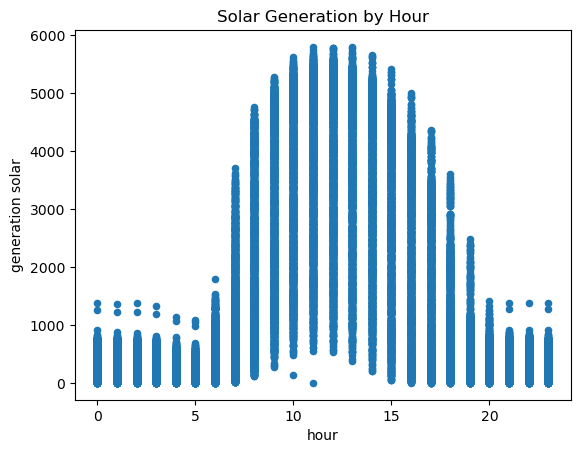

In [9]:
import matplotlib.pyplot as plt

# Convert the 'time' column to datetime and extract the hour
energy_dataset['time'] = pd.to_datetime(energy_dataset['time'], utc=True)
energy_dataset['hour'] = energy_dataset['time'].dt.hour

# Create a scatter plot
energy_dataset.plot(x='hour', y='generation solar', kind='scatter')
plt.title('Solar Generation by Hour')
plt.show()

### Dataset Profiling with `ydata-profiling`

The **`ydata-profiling`** library is a tool for generating comprehensive reports about the structure and content of a dataset. It automates much of the exploratory data analysis (EDA) process, providing insights that would otherwise require multiple lines of code to uncover.

When applied to a dataset, `ydata-profiling` generates a report that includes:
1. **Overview of the Dataset**:
   - Number of variables (columns) and observations (rows).
   - Data types of each column.
2. **Missing Values**:
   - Count and percentage of missing values in each column.
3. **Distributions**:
   - Histograms and statistics for numerical columns.
   - Frequency counts for categorical columns.
4. **Correlations**:
   - Heatmaps and metrics to identify relationships between variables.
5. **Potential Issues**:
   - Constant or duplicate columns.
   - Outliers or skewed distributions.

_(Note: If the report doesn't seem to render properly in Google Colab, you can download the HTML file and open it in your browser.)_

In [ ]:
from ydata_profiling import ProfileReport

# Generate a profiling report for the energy dataset
profile = ProfileReport(energy_dataset, title='Energy Dataset Profiling Report', explorative=True)

# Save the report as an HTML file
profile.to_file('energy_dataset_profile.html')

# Display the report in the notebook (if supported)
profile.to_notebook_iframe()

In [11]:
# Reload the initial data so we can do pre-processing
energy_dataset = pd.read_csv('https://github.com/alexwolson/mdlw_materials/raw/refs/heads/main/data/energy_dataset.csv.gz')
weather_features = pd.read_csv('https://github.com/alexwolson/mdlw_materials/raw/refs/heads/main/data/weather_features.csv.gz')
weather_features = weather_features.rename(columns={'dt_iso': 'time'})

## Data Pre-Processing

With a solid understanding of the dataset, the next step is to prepare the data for machine learning. **Pre-processing** ensures that the dataset is clean, consistent, and in a format suitable for training models. This process often includes:

1. **Normalizing the Data**: Ensures numerical features are on a similar scale to prevent certain features from disproportionately influencing the model.
2. **Converting Non-Numeric Data**: Transforms categorical or textual data into numeric representations that the model can process.
3. **Handling Missing Values**: Ensures there are no gaps in the data, which could cause errors or inaccuracies in the model.
4. **Splitting the Data**: Separates the data into features (inputs) and labels (outputs) for supervised learning tasks.

### Why Normalize Data?
Different features in a dataset may operate on vastly different ranges. For example:
- One column might range from `0` to `1`.
- Another column might range from `0` to `1000`.

Without normalization, the model might treat the larger-range column as more important, simply because of its scale. By **normalizing** the data (subtracting the mean and dividing by the standard deviation), we:
- Center each column around a mean of `0`.
- Scale each column to have a standard deviation of `1`.

This ensures that all features are treated equally by the model.


In [12]:
# Normalize numerical columns in the energy dataset
for column in energy_dataset.columns:
    if column != 'time' and energy_dataset[column].dtype != 'object':
        energy_dataset[column] = (energy_dataset[column] - energy_dataset[column].mean()) / energy_dataset[column].std()

# Normalize numerical columns in the weather features dataset
for column in weather_features.columns:
    if column != 'time' and weather_features[column].dtype != 'object':
        weather_features[column] = (weather_features[column] - weather_features[column].mean()) / weather_features[column].std()

In [13]:
# Look at the normalized data
energy_dataset.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,0.743802,-0.335786,NaN,-0.353677,0.287997,-2.595545,NaN,NaN,NaN,...,-1.463320,NaN,0.284259,-0.847627,NaN,0.303743,-0.564665,-0.723923,0.015436,0.529846
1,2015-01-01 01:00:00+01:00,0.767234,-0.338606,NaN,-0.193810,0.254351,-2.671706,NaN,NaN,NaN,...,-1.483242,NaN,0.132409,-0.848223,NaN,0.121142,-0.822387,-0.943159,-0.121373,0.495349
2,2015-01-01 02:00:00+01:00,0.755518,-0.352708,NaN,-0.347773,0.165647,-2.690746,NaN,NaN,NaN,...,-1.463320,NaN,-0.001083,-0.852992,NaN,-0.005420,-1.131262,-1.303378,-0.174045,0.464372
3,2015-01-01 03:00:00+01:00,0.638359,-0.547311,NaN,-0.594386,-0.063757,-2.633626,NaN,NaN,NaN,...,-1.562930,NaN,-0.070473,-0.856568,NaN,-0.100814,-1.321288,-1.619882,-0.520172,0.101096
4,2015-01-01 04:00:00+01:00,0.521200,-0.736273,NaN,-0.677953,-0.212105,-2.709786,NaN,NaN,NaN,...,-1.602775,NaN,-0.164757,-0.852395,NaN,-0.192115,-1.507831,-1.843270,-0.784214,-0.129823


### Converting Text Data to Numeric: One-Hot Encoding

Before we can move forward, we need to ensure that all of the data is numeric, as most machine learning models require numerical input. However, some columns in our dataset, such as `city_name` and `weather_main`, contain text values. To address this, we will use **one-hot encoding**, a method of converting categorical data into a numeric format.

### What is One-Hot Encoding?
One-hot encoding transforms each unique value in a categorical column into a new binary column:
- If a row contains a specific category, the corresponding binary column is set to `1`.
- If not, it is set to `0`.

For example:
- A `city_name` column with values `['Toronto', 'Montreal', 'Toronto']` would become:
  - `Toronto` column: `[1, 0, 1]`
  - `Montreal` column: `[0, 1, 0]`

This approach ensures that all text data is represented numerically, while preserving the original information.

### Additional Cleanup
After one-hot encoding, we will drop unnecessary columns, such as:
- `weather_description`: A more detailed version of `weather_main` that is redundant for this task.
- `weather_icon`: A visual representation not useful for numerical modeling.

In [14]:
# One-hot encode the 'city_name' and 'weather_main' columns
weather_features = pd.get_dummies(weather_features, columns=['city_name', 'weather_main'])

# Drop unnecessary columns
weather_features = weather_features.drop(columns=['weather_description', 'weather_icon'])

# Preview the modified dataset
weather_features.head()

,time,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,...,weather_main_drizzle,weather_main_dust,weather_main_fog,weather_main_haze,weather_main_mist,weather_main_rain,weather_main_smoke,weather_main_snow,weather_main_squall,weather_main_thunderstorm
0,2015-01-01 00:00:00+01:00,-2.385140,-2.244417,-2.393774,-0.011435,0.391571,-0.701633,-0.896917,-0.189275,-0.052105,...,False,False,False,False,False,False,False,False,False,False
1,2015-01-01 01:00:00+01:00,-2.385140,-2.244417,-2.393774,-0.011435,0.391571,-0.701633,-0.896917,-0.189275,-0.052105,...,False,False,False,False,False,False,False,False,False,False
2,2015-01-01 02:00:00+01:00,-2.483443,-2.343594,-2.485385,-0.011267,0.437227,-1.178753,-1.231359,-0.189275,-0.052105,...,False,False,False,False,False,False,False,False,False,False
3,2015-01-01 03:00:00+01:00,-2.483443,-2.343594,-2.485385,-0.011267,0.437227,-1.178753,-1.231359,-0.189275,-0.052105,...,False,False,False,False,False,False,False,False,False,False
4,2015-01-01 04:00:00+01:00,-2.483443,-2.343594,-2.485385,-0.011267,0.437227,-1.178753,-1.231359,-0.189275,-0.052105,...,False,False,False,False,False,False,False,False,False,False


### Handling Missing Values

In real-world datasets, **missing values** are common and can disrupt machine learning models. To ensure data quality, it’s essential to handle them effectively. There are several strategies for managing missing values:

1. **Removing Rows or Columns**: Eliminates data with missing values, but at the cost of potentially losing valuable information.
2. **Imputing Missing Values**: Fills in missing data with an estimated value, such as the mean or median.
3. **Using Models with Built-in Handling**: Some models can treat missing values as a separate category, preserving the dataset's structure.

We’ll explore each method in turn and assess how they impact the performance of a machine learning model.

---

### Removing Rows with Missing Values

The simplest way to handle missing values is to **remove any rows containing them**. While straightforward, this method can reduce the size of the dataset, possibly discarding useful data.

In Pandas, the `dropna()` method makes it easy to remove rows with missing values. Let’s see how this affects the **energy demand dataset** by comparing the original dataset's shape to the modified version:

In [15]:
# Remove rows with missing values
energy_dataset_dropped = energy_dataset.dropna()

# Compare the shape of the original and modified datasets
print(f'Original data shape: {energy_dataset.shape}')
print(f'Modified data shape: {energy_dataset_dropped.shape}')

Original data shape: (35064, 29)
Modified data shape: (0, 29)


...whoops! It looks like we have lost the significant majority of our dataset with this approach. If we inspect the data further, we can see which columns contain a significant number of missing values:

In [16]:
# Count the number of missing values for each column
missing_values = energy_dataset.isnull().sum()

# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]

# Display the result
missing_values

generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas             35064
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                    35064
generation fossil peat                         35064
generation geothermal                          35064
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                              35064
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                              

As indicated earlier by ydata profiling, we can see that there are a number of columns which don't contain any information. We can remove these columns and then try removing rows with missing values again:

In [18]:
missing_columns = [
    'generation fossil coal-derived gas',
    'generation fossil oil shale',
    'generation fossil peat',
    'generation geothermal',
    'generation hydro pumped storage aggregated',
    'generation marine',
    'generation wind offshore',
    'forecast wind offshore eday ahead'
]

In [19]:
# Remove columns with a large number of missing values (and non-numeric columns)
energy_dataset_removed = energy_dataset.drop(columns=missing_columns)

# Remove rows with missing values
energy_dataset_removed = energy_dataset_removed.dropna()

# Look at the shape of the original and modified data
print(f'Original data shape: {energy_dataset.shape}')
print(f'Modified data shape: {energy_dataset_removed.shape}')

Original data shape: (35064, 29)
Modified data shape: (35018, 21)



Now that we’ve removed rows with missing values, every row in our dataset has complete information. This makes the dataset easier to work with and ensures compatibility with machine learning models. However, this approach involves a tradeoff:
- **Pros**: The dataset is clean and ready for modeling, with no missing values to handle.
- **Cons**: We’ve reduced the dataset size, potentially losing valuable patterns and diversity in the data.

There’s also a more subtle risk introduced by this method: **bias**. By removing rows with missing values, we might inadvertently remove certain types of data that are systematically incomplete, leading to a dataset that no longer accurately represents the real-world scenario. Can you think of situations where this could be an issue? We’ll revisit this idea later.

---

### Building a Simple Machine Learning Model

To explore the cleaned dataset, let’s build a simple machine learning model. Instead of predicting energy generation based on weather, we’ll flip the task:
**Predict the current weather type based on the current energy generation.**

This reverse prediction might seem unexpected, but it’s a useful exercise to understand the relationship between features (energy generation) and labels (weather type).

We will use a **Random Forest Classifier**, a versatile and robust machine learning algorithm that:
- Combines multiple decision trees to improve accuracy (an ensemble method).
- Handles both classification and regression tasks well.

### Splitting Data into Features and Labels
Before building the model, we need to:
1. **Define Features**: These are the input variables (energy generation data) used for prediction.
2. **Define Labels**: These are the target variables (weather type) we aim to predict.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from time import time

# Merge energy demand and weather datasets on the 'time' column using an inner join
# This ensures only rows with matching time entries in both datasets are included
df = pd.merge(energy_dataset_removed, weather_features, on='time', how='inner')

# Select features for the model (energy generation data)
# These are the columns that will be used to predict the weather type
X = df[['generation biomass',
        'generation fossil brown coal/lignite',
        'generation fossil gas',
        'generation fossil hard coal',
        'generation fossil oil',
        'generation hydro pumped storage consumption',
        'generation hydro run-of-river and poundage',
        'generation hydro water reservoir',
        'generation nuclear',
        'generation other',
        'generation other renewable',
        'generation solar',
        'generation waste',
        'generation wind onshore']]

# Select labels for the model (one-hot encoded weather types)
# Columns starting with 'weather_main' represent the one-hot encoded target classes
y = df[[column for column in df.columns if column.startswith('weather_main')]]

In [21]:
# Split the dataset into training and testing sets
# 80% of the data is used for training, and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Reset the indices for the training and testing sets
# This is helpful to ensure the indices are sequential and clean after the split
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Print the shapes of the training and testing datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (142532, 14)
X_test shape: (35634, 14)
y_train shape: (142532, 12)
y_test shape: (35634, 12)


In [22]:
# Initialize the Random Forest model
# n_jobs=-1 allows the model to use all available CPU cores for faster training
model = RandomForestClassifier(n_jobs=-1)

# Fit the model to the training data
print('Fitting model...')
start_time = time()  # Track the start time for training
model.fit(X_train, y_train)
print(f'Model fit in {time() - start_time:.0f} seconds')  # Print training time

# Evaluate the model on the testing data
print('Evaluating model...')
predictions = model.predict(X_test)  # Predict weather types for the test set
accuracy = accuracy_score(y_test, predictions)  # Calculate the accuracy of the predictions

# Print the model's accuracy
print(f'Model accuracy: {accuracy*100:.2f}%')

Fitting model...
Model fit in 30 seconds
Evaluating model...
Model accuracy: 44.38%


After training the Random Forest model, you might observe an accuracy of approximately **44%**. This result is promising, especially given that we are predicting one of **12 different weather types**. If predictions were made randomly, the expected accuracy would be around **8%**—so this is a significant improvement.

However, accuracy alone doesn't tell the full story. The model may perform better for certain weather types than others, especially if some types are more common in the dataset. To understand this, we can calculate the accuracy for each weather type individually.

### Evaluating Per-Weather-Type Accuracy
To break down the accuracy by weather type:
1. **Count**: Determine how many test samples belong to each weather type.
2. **Correct**: Count how many predictions for that type are correct.
3. **Accuracy**: Compute the proportion of correct predictions for each type.

The code below prints a table showing the performance for each weather type:

In [23]:
import numpy as np

print("Weather Type              | Count | Correct | Accuracy")
print("--------------------------|-------|---------|---------")

for i, column in enumerate(y_test.columns):
    count = y_test[column].sum()  # Total number of samples for this weather type
    indices = y_test[y_test[column]].index  # Indices of samples for this type
    predictions_for_column = predictions[indices]  # Predictions for this type
    correct = predictions_for_column[:, i].sum()  # Correct predictions for this type
    accuracy = correct / count if count > 0 else np.nan  # Avoid division by zero

    print(f'{column:<25} | {count:<5} | {correct:<7} | {accuracy:.2f}')

Weather Type              | Count | Correct | Accuracy
--------------------------|-------|---------|---------
weather_main_clear        | 16610 | 9689    | 0.58
weather_main_clouds       | 13429 | 5646    | 0.42
weather_main_drizzle      | 344   | 0       | 0.00
weather_main_dust         | 64    | 0       | 0.00
weather_main_fog          | 526   | 0       | 0.00
weather_main_haze         | 85    | 0       | 0.00
weather_main_mist         | 793   | 11      | 0.01
weather_main_rain         | 3478  | 468     | 0.13
weather_main_smoke        | 9     | 0       | 0.00
weather_main_snow         | 64    | 0       | 0.00
weather_main_squall       | 0     | 0       | nan
weather_main_thunderstorm | 232   | 1       | 0.00


Our evaluation has uncovered a major flaw in the model: it performs well for common weather types like `clear`, `clouds`, and `rain`, but struggles with the remaining weather conditions. This is largely due to an **imbalance** in the dataset, where most examples fall into just a few categories, leaving the other weather types underrepresented.

### Why is this a problem?
- The model learns patterns based on the data it sees most frequently, so it becomes biased toward the majority classes.
- Rare weather conditions have fewer examples, making it harder for the model to recognize them reliably.
- This results in poor generalization for less common weather types, even if they are critical for certain applications.

### Solution: Group Rare Weather Types
To address this imbalance, we will:
1. Retain the original categories for `clear`, `clouds`, and `rain`.
2. Combine all other weather types into a single category called `weather_main_other`.

This reduces the total number of categories and provides the model with more examples for the combined "other" category, improving its ability to generalize.

### Code to Group Weather Types
The following code creates the new `weather_main_other` category:

In [24]:
# Retain columns for clear, clouds, and rain
y_grouped = y[['weather_main_clear', 'weather_main_clouds', 'weather_main_rain']].copy()

# Add a new column for "other" weather conditions
y_grouped['weather_main_other'] = ~y_grouped.any(axis=1)  # True if none of the main categories apply

# Summarize the counts for each category
y_grouped.sum(axis=0)

After grouping the less common weather types into a single category (`weather_main_other`), our dataset is now more balanced, with sufficient examples for each category. This should allow the model to better generalize across all weather types. Let’s retrain the Random Forest model and evaluate its performance.

In [26]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_grouped, test_size=0.2, random_state=42)

# Reset indices for clean data
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Train the Random Forest model
model = RandomForestClassifier()
print('Fitting model...')
start_time = time()
model.fit(X_train, y_train)
print(f'Model fit in {time() - start_time:.0f} seconds')

# Evaluate the model
print('Evaluating model...')
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Model accuracy: {accuracy*100:.2f}%')

Fitting model...
Model fit in 57 seconds
Evaluating model...
Model accuracy: 44.31%


In [27]:
print("Column                    | Count | Correct | Accuracy")
print("--------------------------|-------|---------|---------")
for i, column in enumerate(y_test.columns):
    count = y_test[column].sum()
    indices = y_test[y_test[column]].index
    predictions_for_column = predictions[indices]
    correct = predictions_for_column[:, i].sum()
    accuracy = correct / count if count > 0 else np.nan

    print(f'{column:<25} | {count:<5} | {correct:<7} | {accuracy:.4f}')

Column                    | Count | Correct | Accuracy
--------------------------|-------|---------|---------
weather_main_clear        | 16577 | 9514    | 0.5739
weather_main_clouds       | 13501 | 5708    | 0.4228
weather_main_rain         | 3568  | 456     | 0.1278
weather_main_other        | 1988  | 110     | 0.0553


### Challenges with Imbalanced Classes

Despite our efforts to balance the dataset by grouping less common weather types, the model still struggles to accurately predict these categories. This is a common issue in machine learning, where models tend to be **biased toward the most common classes**.

This bias occurs because:
- The model has more examples to learn from for the frequent classes.
- Rare classes contribute less to the overall loss during training, leading the model to optimize for the majority classes.

### Strategies to Address Class Imbalance
There are several ways to tackle this challenge:

1. **Collect More Data for Less Common Classes**:
   - Increase the representation of rare weather types by collecting additional samples.
   - This improves the model’s ability to learn patterns for these classes.

2. **Use a Model That Handles Imbalanced Classes Better**:
   - Some models (e.g., Gradient Boosting, specialized neural networks) are better suited for imbalanced datasets.
   - Techniques like class weighting can also help emphasize the importance of rare classes during training.

3. **Oversampling or Undersampling**:
   - **Oversampling**: Duplicate or generate synthetic data for the less common classes to increase their representation.
   - **Undersampling**: Reduce the number of samples from the majority classes to create a more balanced dataset.

### What’s Next?
We will explore some of these approaches in more detail later in the workshop. For now, keep in mind that handling imbalanced datasets is a crucial step in building fair and effective machine learning models. It often requires a combination of data collection, preprocessing, and model tuning to achieve the best results.

## Conclusion

In this exercise, we explored the challenges of building a machine learning model to predict weather types based on energy generation data. Along the way, we learned about key steps in the machine learning workflow, including:

- **Handling Missing Data**: Removing rows with missing values and discussing the tradeoffs.
- **Balancing Classes**: Grouping rare weather types into a single category to create a more balanced dataset.
- **Training and Evaluating Models**: Using a Random Forest Classifier to make predictions and assess its performance.

While our efforts improved the dataset’s balance, the model still struggled with the less common weather types. This highlights an important lesson: addressing class imbalance often requires a combination of advanced techniques and additional data collection.

### Key Takeaways:
1. Real-world datasets often contain imbalances and missing values, which require thoughtful preprocessing.
2. Even with preprocessing, model performance can remain biased toward majority classes, necessitating additional strategies like oversampling or class-weighted models.
3. Machine learning is an iterative process, requiring experimentation and refinement to achieve better results.

---

### Bonus Task: Using Oversampling to Improve Performance

If you’ve finished early and want to dig deeper, try using **oversampling** to improve the model’s ability to predict less common weather types. Oversampling involves increasing the representation of the minority classes in the training dataset. This can be done using libraries like `imbalanced-learn`, which provides tools to handle imbalanced datasets effectively.

#### Steps to Implement Oversampling:
1. **Install imbalanced-learn**:
   - If not already installed, use `pip install imbalanced-learn` to add this library to your environment.

2. **Apply SMOTE (Synthetic Minority Oversampling Technique)**:
   - Use `SMOTE` from `imbalanced-learn` to generate synthetic samples for the minority classes in the training data.
   - SMOTE creates new samples by interpolating between existing samples, which avoids duplication and makes the training data more diverse.

3. **Integrate Oversampling into the Pipeline**:
   - First, split your dataset into training and testing sets as before.
   - Apply SMOTE to the training set only, ensuring the test set remains representative of real-world data.

4. **Train and Evaluate the Model**:
   - Train your Random Forest model on the oversampled training set.
   - Evaluate its performance on the original test set and compare the results to your previous model.

#### Example Methods:
- Use `from imblearn.over_sampling import SMOTE` to import the SMOTE class.
- Apply `SMOTE().fit_resample(X_train, y_train)` to oversample the training set.

In [28]:
!pip install imbalanced-learn

In [30]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority classes
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train.values, y_train.values)

# Train the Random Forest model on the resampled data
model_resampled = RandomForestClassifier(n_jobs=-1)
print('Fitting model...')
start_time = time()
model_resampled.fit(X_train_resampled, y_train_resampled)
print(f'Model fit in {time() - start_time:.0f} seconds')

# Evaluate the model on the original test set
print('Evaluating model...')
predictions_resampled = model_resampled.predict(X_test)
accuracy_resampled = accuracy_score(y_test, predictions_resampled)
print(f'Model accuracy with oversampling: {accuracy_resampled*100:.2f}%')

Fitting model...
Model fit in 192 seconds
Evaluating model...


/Users/alex/mambaforge/envs/lab_1_1/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Model accuracy with oversampling: 43.44%


In [31]:
print("Column                    | Count | Correct | Accuracy")
print("--------------------------|-------|---------|---------")
for i, column in enumerate(y_test.columns):
    count = y_test[column].sum()
    indices = y_test[y_test[column]].index
    predictions_for_column = predictions_resampled[indices]
    correct = predictions_for_column[:, i].sum()
    accuracy = correct / count if count > 0 else np.nan

    print(f'{column:<25} | {count:<5} | {correct:<7} | {accuracy:.4f}')

Column                    | Count | Correct | Accuracy
--------------------------|-------|---------|---------
weather_main_clear        | 16577 | 9045    | 0.5456
weather_main_clouds       | 13501 | 5590    | 0.4140
weather_main_rain         | 3568  | 615     | 0.1724
weather_main_other        | 1988  | 231     | 0.1162
